# Comparing results of Lasso and Ridge on given datasets

In [135]:
import numpy as np
import sklearn.linear_model as model
import pandas as pd

from sklearn import datasets

from scipy.stats import multivariate_normal as mvn

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
seed = 11148705
np.random.seed(seed)

In [76]:
def generate_random_data(n, betas, disturbance_var, correlated=True, seed=seed):
    k = betas.shape[0] 
    cov_matrix = datasets.make_spd_matrix(k, random_state=seed)
    
    X = mvn.rvs(mean = np.zeros(k), cov=cov_matrix, size = n)
    y = X@betas + np.random.normal(scale=disturbance_var, size=(n,))
    
    return y, X

In [128]:
def fit_various(y, X, true_betas, reg_consts, models = [model.Lasso, model.Ridge]):
    regs = len(reg_consts)
    k = true_betas.shape[0]
    
    lasso_betas = np.zeros((regs, k))
    ridge_betas = np.zeros((regs, k))

    
    for i, reg in enumerate(reg_consts):
        
        for j, model in enumerate(models):
            
            m = model(fit_intercept=False, alpha=reg)
            fit = m.fit(X, y)
            coeff = fit.coef_
            if j == 0:
                lasso_betas[i] = coeff
            else:
                ridge_betas[i] = coeff
        
    return lasso_betas, ridge_betas
            

In [160]:
def check_comparison(n = 10, betas = np.array([3., 2., 0.05, 0.]), variance = 1, reg = np.linspace(0.1, .7, 5)):
    

    y, X = generate_random_data(n, betas, variance)
    betas_l, betas_r = fit_various(y, X, betas, reg)
    
    
    lasso_df = pd.DataFrame(betas_l, columns=[f'Beta {i}' for i in range(len(betas))], index=reg)
    ridge_df = pd.DataFrame(betas_r, columns=[f'Beta {i}' for i in range(len(betas))], index=reg)
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data = lasso_df)
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(data = ridge_df)
    plt.show()
    plt.close()

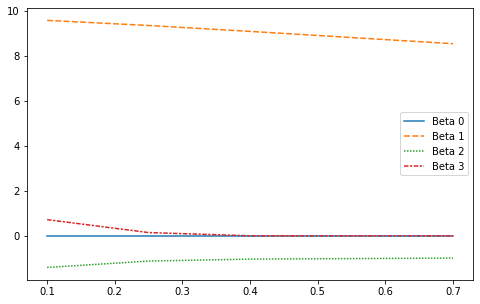

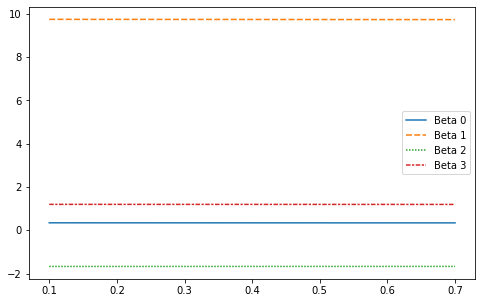

In [172]:
check_comparison(n = 1000, reg = np.linspace(0.1, 0.7, 5), betas = np.array([4., 2., 1., 0.]), variance=7)